In [ ]:
!pip install scikit-dimension
!pip install --upgrade gap-stat
!pip install --upgrade scikit-learn
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 410 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 7.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ffe3c6ec87987a1a4e071b4aa660985bbc911bc156798ef68fceb4849ffe45ec
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=fec02302fa922d9345055cd7a80f3ccf103a664d81cafe1c3bd5fd325ad7c2b0
  Stored i

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R23.zip' R23.zip

In [ ]:
!unzip R23.zip

Archive:  R23.zip
  inflating: R23.txt                 


In [ ]:
!head R23.txt

10 20686 8 38 20
3 6 5 6 4 4 5 5
33.717615226904840 24.485531792815415 1.394307706335274 4.096518037783828 0.157377945427261 16.809764156624311 21.664128252253118 18.547715831060636 2.924425514609473 -4.912414605905018
114.117659574072110 -25.577840019625988 -14.426233350401972 23.775275885293095 -7.048330262268625 -30.352142241583746 8.174181428163923 67.831190886188551 -23.528973216228088 -84.462213211485576
114.118974848838690 -22.875476539504675 -13.211213620493405 19.814404886974618 -18.755137366158049 -21.098175967681549 -15.267693989913166 79.329613848836132 -25.897424828147280 -83.128797936850120
30.214660660311992 24.292736045732255 2.188651414581860 4.556330957292258 -1.854334018193290 2.326415877760894 16.601708981061819 15.203560387081911 6.224696968828916 1.098799460155441
10.635830624677004 14.016894982476853 1.279374691802867 4.029988040238174 0.448451089142580 18.905349305636133 9.088619893428765 22.834073695890144 26.790588577914306 17.491599992700849
128.1303209764631

In [ ]:
with open('R23.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, m, k, p = [int(item) for item in line]
  line = fp.readline()
  line = line.split(' ')
  K = [int(item) for item in line]


In [ ]:
!tail -n +3 R23.txt > R23_clean.txt

In [ ]:
vectors = np.fromfile('R23_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors

array([[  33.71761523,   24.48553179,    1.39430771, ...,   18.54771583,
           2.92442551,   -4.91241461],
       [ 114.11765957,  -25.57784002,  -14.42623335, ...,   67.83119089,
         -23.52897322,  -84.46221321],
       [ 114.11897485,  -22.87547654,  -13.21121362, ...,   79.32961385,
         -25.89742483,  -83.12879794],
       ...,
       [ 711.21707692, -204.18243728,    9.69309471, ...,   60.3501898 ,
          92.170413  ,  -77.52765625],
       [ 595.02136841, -165.79637376,   14.73367789, ...,  102.15152853,
          71.84509017,  -12.97017839],
       [ 828.61395246, -131.39195474,  -17.56845059, ...,  106.77791487,
         107.46033167, -105.48928098]])

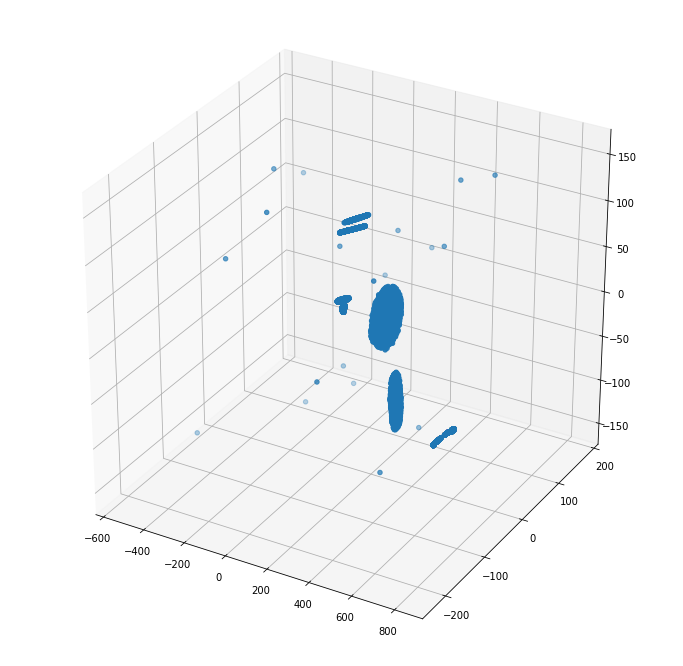

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 3])
_ = plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='diag', 
                      random_state=0, n_init=32, max_iter=10000, tol=1e-6)
gmm.fit(vectors)



GaussianMixture(covariance_type='diag', max_iter=10000, n_components=8,
                n_init=32, random_state=0, tol=1e-06)

In [ ]:
gmm.means_

array([[ 1.26409065e+02, -3.14692551e+01, -1.36891297e+01,
         2.13723744e+01, -1.41503802e+01, -2.47381324e+01,
        -6.04706340e+00,  7.48068225e+01, -2.37364513e+01,
        -6.80883521e+01],
       [ 7.13362818e+02, -2.10925690e+02,  9.67026124e+00,
         2.67672374e+01,  1.50464420e+01,  2.26702157e+01,
        -1.17593196e+02,  5.01290851e+01,  1.04016763e+02,
        -7.87996348e+01],
       [ 4.69686562e+02, -1.08265569e+02,  5.96745363e+01,
         7.62216476e+01, -7.19159583e+01,  5.02043841e+01,
        -4.61702269e+01,  8.70670746e+01,  8.36421423e+01,
        -5.06706441e+01],
       [ 5.85674580e+02, -1.68540984e+02,  4.72612876e+01,
         9.10037616e+01, -6.47332060e+01,  5.39913501e+00,
        -1.53250745e+02,  1.01992664e+02,  6.72333177e+01,
        -1.20762751e+01],
       [ 3.52283447e+02, -1.29930356e+02,  6.23731143e+00,
         1.53436707e+02, -7.30317998e+01,  2.77686175e+00,
         2.73489034e+01,  4.25884475e+01,  6.74149628e+01,
        -6.

In [ ]:
def top_k_outliers(vectors, k):
  scores = gmm.score_samples(vectors)
  top_k = np.argpartition(-scores, -k)[-k:]
  return top_k, scores[top_k]

In [ ]:
outlier_ind, _ = top_k_outliers(vectors, p)

In [ ]:
labels = gmm.predict(vectors)
if p > 0:
  labels[outlier_ind] = -1

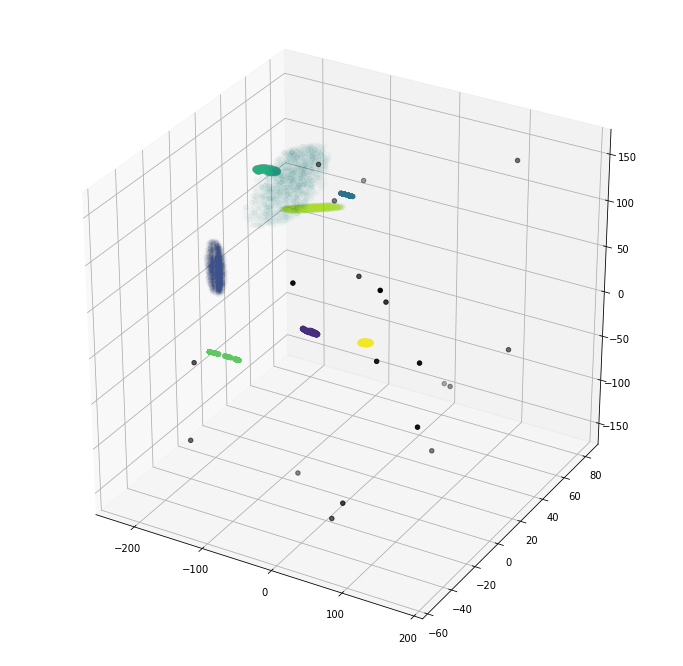

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(vectors[:, 1], vectors[:, 2], vectors[:, 3], c=labels, alpha=0.01)
O = vectors[labels==-1]
ax.scatter(O[:, 1], O[:, 2], O[:, 3], c='black')

_ = plt.show()

In [ ]:
from numba import njit, jit
from random import choices

@jit
def noisy_center_radius(points, k):
  dist_matrix = np.zeros((points.shape[0], points.shape[0]))
  for i in range(points.shape[0]):
    for j in range(i):
      dist = np.linalg.norm(points[i] - points[j])
      dist_matrix[i, j] = dist
  dist_matrix = dist_matrix.reshape(-1)
  top_k_dist = np.argsort(dist_matrix)[-k:]
  rows = top_k_dist // points.shape[0]
  cols = top_k_dist % points.shape[0]
  center = 0.5*(points[cols] + points[rows]).mean(axis=0)
  radius = dist_matrix[top_k_dist].mean()/2
  return center, radius

def center_radius(points):
  dist = torch.cdist(points, points)
  ind = dist.argmax()
  row = (torch.div(ind, points.size(0), rounding_mode='floor')).item()
  col = (ind % points.size(0)).item()
  radius = (dist[row, col]/2).item()
  center = 0.5 * (points[row] + points[col])
  return center, radius


manifold_center = []
manifold_radius = []

for sphere in tqdm(range(m)):
  sampled = choices(np.where(labels==sphere)[0], k=5000)
  points = torch.from_numpy(vectors[sampled])
  # points = vectors[labels==sphere]
  center, radius = center_radius(points)
  manifold_center.append(center)
  manifold_radius.append(radius)

manifold_center = np.vstack(manifold_center)

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
gmm.means_

array([[ 1.26409065e+02, -3.14692551e+01, -1.36891297e+01,
         2.13723744e+01, -1.41503802e+01, -2.47381324e+01,
        -6.04706340e+00,  7.48068225e+01, -2.37364513e+01,
        -6.80883521e+01],
       [ 7.13362818e+02, -2.10925690e+02,  9.67026124e+00,
         2.67672374e+01,  1.50464420e+01,  2.26702157e+01,
        -1.17593196e+02,  5.01290851e+01,  1.04016763e+02,
        -7.87996348e+01],
       [ 4.69686562e+02, -1.08265569e+02,  5.96745363e+01,
         7.62216476e+01, -7.19159583e+01,  5.02043841e+01,
        -4.61702269e+01,  8.70670746e+01,  8.36421423e+01,
        -5.06706441e+01],
       [ 5.85674580e+02, -1.68540984e+02,  4.72612876e+01,
         9.10037616e+01, -6.47332060e+01,  5.39913501e+00,
        -1.53250745e+02,  1.01992664e+02,  6.72333177e+01,
        -1.20762751e+01],
       [ 3.52283447e+02, -1.29930356e+02,  6.23731143e+00,
         1.53436707e+02, -7.30317998e+01,  2.77686175e+00,
         2.73489034e+01,  4.25884475e+01,  6.74149628e+01,
        -6.

In [ ]:
manifold_radius

[27.01751825118128,
 31.22944688346429,
 26.262366324165384,
 34.36018097643088,
 33.007981513992895,
 25.076250269388016,
 29.047636969447638,
 26.38977873704907]

In [ ]:
manifold_center

array([[ 1.27513459e+02, -3.24514095e+01, -1.38264268e+01,
         2.18199526e+01, -1.28275117e+01, -2.57838300e+01,
        -3.39813281e+00,  7.35075014e+01, -2.79139937e+01,
        -6.83468627e+01],
       [ 7.13521558e+02, -2.12302522e+02,  9.68542195e+00,
         2.81194958e+01,  1.31027224e+01,  2.24408129e+01,
        -1.15816226e+02,  5.14461642e+01,  1.04255801e+02,
        -8.19170065e+01],
       [ 4.69682528e+02, -1.08260644e+02,  5.96743540e+01,
         7.62206820e+01, -7.18702397e+01,  5.02147893e+01,
        -4.54387038e+01,  8.55046414e+01,  8.59371074e+01,
        -5.06926709e+01],
       [ 5.88235142e+02, -1.69844913e+02,  4.46136379e+01,
         9.07874190e+01, -6.28523577e+01,  4.22170439e+00,
        -1.52535191e+02,  9.98637833e+01,  6.94477114e+01,
        -1.30949713e+01],
       [ 3.55426951e+02, -1.28391399e+02,  6.14414233e+00,
         1.53453928e+02, -7.30997314e+01,  2.97120982e+00,
         2.66213836e+01,  4.51870154e+01,  7.24730334e+01,
        -5.

In [ ]:
from scipy.optimize import minimize, differential_evolution, dual_annealing

@njit
def loss_center_given_radius(center, points, radius):
  # return (((points - center)**2).sum(axis=1) > radius**2).sum()
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)

@njit
def loss_center_radius(x, points):
  center = x[:-1]
  radius = x[-1]
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)


@jit
def estimate_corrected_radius(sphere):
  center_b1 = manifold_center[sphere, :] - 2.0
  center_b2 = manifold_center[sphere, :] + 2.0
  
  bounds = [(center_b1[i], center_b2[i]) for i in range(d)]
  # bounds.append([radius_b1, radius_b2])
  sampled = choices(np.where(labels==sphere)[0], k=300)
  points = vectors[sampled]
  result = dual_annealing(func=loss_center_given_radius,
                        bounds=bounds, maxiter=3000,
                        args=(points, manifold_radius[sphere]))
  print(result)
  center = result.x
                        
  return center

In [ ]:
manifold_corrected_center = np.vstack([estimate_corrected_radius(sphere) for sphere in tqdm(range(m))])

  0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-28-d7ecb39d6c9b>:15: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "estimate_corrected_radius" failed type inference due to: Untyped global name 'choices': cannot determine Numba type of <class 'method'>

File "<ipython-input-28-d7ecb39d6c9b>", line 22:
def estimate_corrected_radius(sphere):
    <source elided>
  # bounds.append([radius_b1, radius_b2])
  sampled = choices(np.where(labels==sphere)[0], k=300)
  ^

  @jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "estimate_corrected_radius" was compiled in object mode without forceobj=True.

File "<ipython-input-28-d7ecb39d6c9b>", line 16:
@jit
def estimate_corrected_radius(sphere):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is

     fun: 0.0017277807102442971
 message: ['Maximum number of iteration reached']
    nfev: 141645
    nhev: 0
     nit: 3000
    njev: 7422
  status: 0
 success: True
       x: array([127.51157307, -32.45140138, -13.82691036,  21.82019388,
       -12.82540757, -25.78445807,  -3.39432209,  73.50582597,
       -27.92153368, -68.35142873])
     fun: 29.542994524943975
 message: ['Maximum number of iteration reached']
    nfev: 113331
    nhev: 0
     nit: 3000
    njev: 4848
  status: 0
 success: True
       x: array([ 713.52530776, -211.95141926,    9.67841825,   27.49474108,
         12.74196639,   21.86661674, -115.85832167,   51.164137  ,
        103.39667993,  -82.16632706])
     fun: 0.21626590890428196
 message: ['Maximum number of iteration reached']
    nfev: 138312
    nhev: 0
     nit: 3000
    njev: 7119
  status: 0
 success: True
       x: array([ 469.6957038 , -108.28339049,   59.67436471,   76.22081462,
        -71.87592138,   50.21348833,  -45.52948286,   85.4992368 ,
   

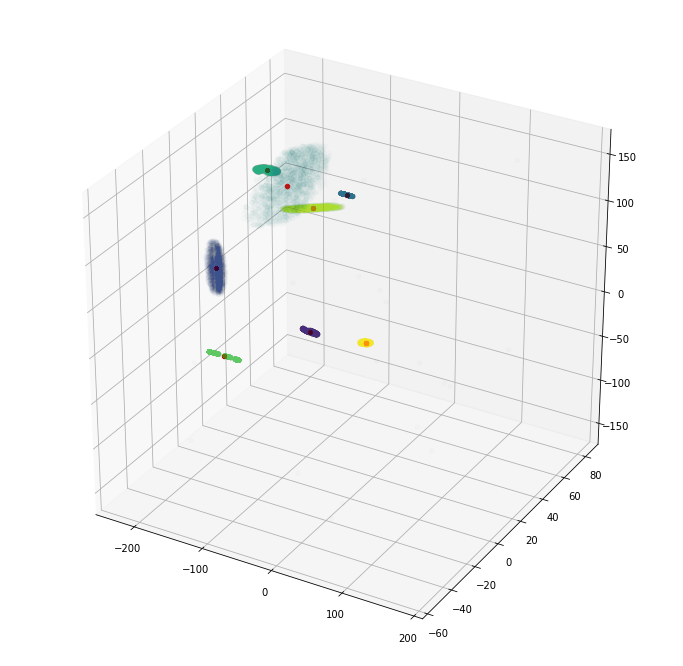

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# t_colors = (S.flatten().abs() < 0.1).numpy() * 1
# ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=t_colors)
ax.scatter(vectors[:, 1], vectors[:, 2], vectors[:, 3], c=labels, alpha=0.01)
for sphere in range(m):
  ax.scatter(manifold_corrected_center[sphere, 1], manifold_corrected_center[sphere, 2], manifold_corrected_center[sphere, 3], c='red')

_ = plt.show()

In [ ]:
import skdim.id as intd

manifold_dims = []

for sphere in tqdm(range(m)):
  lpca = intd.lPCA().fit_pw(vectors[labels==sphere], n_neighbors = 64, n_jobs = 1)
  # pca = intd.DANCo().fit(vectors[labels==sphere])
  # manifold_dims.append(pca.dimension_)
  manifold_dims.append(int(np.round(lpca.dimension_pw_.mean())))
  

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
for sphere in range(m):
  if manifold_dims[sphere] == 1:
    manifold_dims[sphere] = 2

In [ ]:
manifold_dims

[2, 6, 3, 8, 3, 2, 6, 4]

In [ ]:
estimated_n_clusters

[6, 9, 7, 9, 9, 3, 8, 9]

In [ ]:
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='joblib')

In [ ]:
K

[3, 6, 5, 6, 4, 4, 5, 5]

In [ ]:
K_manual = [6, 3, 4, 5, 5, 5, 4, 6]

In [ ]:
from sklearn.cluster import SpectralClustering
from umap import UMAP


c_index = 0
points = vectors[labels==c_index]
reducer = UMAP(n_components=3, densmap=True, n_neighbors=100, min_dist=0.0)
points_red = reducer.fit_transform(points)
cluster = SpectralClustering(n_clusters=5, random_state=0,
                             affinity='nearest_neighbors')
# cluster = GaussianMixture(n_components=5, covariance_type='full', n_init=16)
cluster.fit(points)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5, random_state=0)

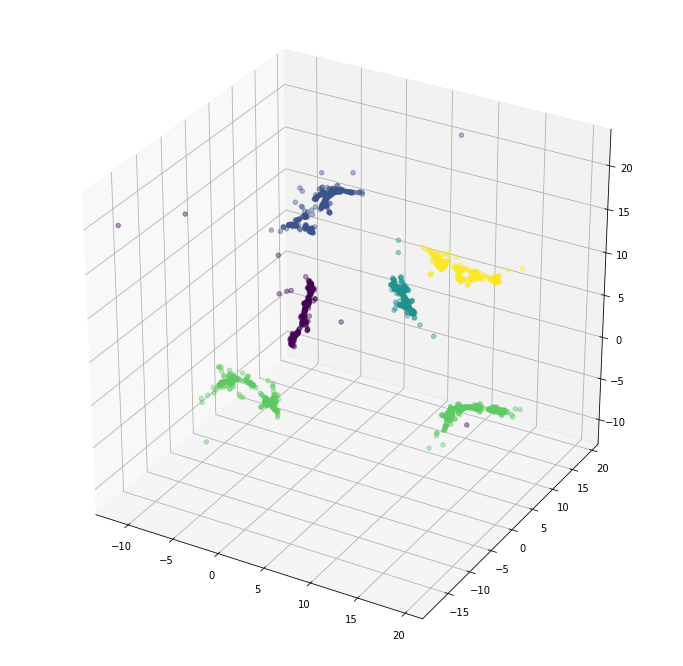

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(points_red[:, 1], points_red[:, 0], points_red[:, 2], c=cluster.labels_, alpha=0.4)
_ = plt.show()

In [ ]:
def estimate_n_cluster(sphere):
  points = vectors[labels==sphere]
  
  reducer = UMAP(n_components=manifold_dims[sphere],
                 densmap=True, n_neighbors=100, min_dist=0.0)
  
  points_red = reducer.fit_transform(points)

  n_clusters = optimalK(points_red, cluster_array=np.arange(2, 10))

  return n_clusters

estimated_n_clusters = []

for sphere in tqdm(range(m)):
  estimated_n_clusters.append(estimate_n_cluster(sphere))

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
def match_K(spec, est):
  sorted_K = np.array(sorted(spec))
  return sorted_K[np.array(est).argsort()]


In [ ]:
K_estimated = match_K(K, estimated_n_clusters)

In [ ]:
K = K_estimated 

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[labels==sphere]
  original_index = np.where(labels==sphere)[0]
  # affinity = 1.0 - pairwise_distances(points, metric="cosine")
  cluster = SpectralClustering(n_clusters=K[sphere], random_state=0,
                               affinity='nearest_neighbors')
  cluster.fit(points)
  submanifold_clusters = []
  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(cluster.labels_ == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
from numba import njit
from sklearn.decomposition import PCA

@njit
def get_best_fitting_plane_vector(centered, dim):

    # Calculate the covariance matrix of the coordinates
    covariance_matrix = np.cov(centered, rowvar=False) # Variables = columns

    # Calculate the eigenvalues & eigenvectors of the covariance matrix
    e_val, e_vect = np.linalg.eig(covariance_matrix)

    # The normal vector to the plane is the eigenvector associated to the minimum eigenvalue
    min_eval = np.argsort(e_val)[:dim]
    normal_vector = e_vect[:, min_eval]

    return normal_vector

def get_best_fitting_plane_vector_pca(centered, dim):

    pca = PCA(n_components=d)

    pca.fit(centered)

    normal_vector = pca.components_[-dim:]

    return normal_vector.T

In [ ]:
affine_a = []
affine_b = []

for sphere in tqdm(range(m)):
  points = vectors[labels==sphere]
  shift = points.mean(axis=0)
  centered = points - shift
  a = get_best_fitting_plane_vector_pca(centered, d-manifold_dims[sphere])
  b = a.T @ shift
  affine_a.append(a)
  affine_b.append(b)


  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
affine_a

[array([[-8.74592583e-02, -7.77503417e-01, -9.98217551e-02,
          1.29826627e-01, -4.79799593e-04,  1.35583770e-02,
         -6.57558042e-02,  1.50830702e-03],
        [-2.35894942e-02, -1.39176159e-01,  9.95230833e-02,
          8.98382011e-01, -9.20261714e-03,  4.34653173e-02,
         -1.26939606e-01,  9.75681013e-03],
        [-3.46901474e-02,  3.03481253e-03,  4.53604568e-03,
         -5.38273376e-03, -3.63536665e-02,  1.04767691e-02,
         -7.88167213e-02, -9.95346724e-01],
        [ 1.13087216e-01, -5.06459748e-02,  5.23639344e-02,
          1.21161524e-01,  6.08218050e-01, -2.87691364e-01,
          7.09156046e-01, -8.71518034e-02],
        [ 3.34242197e-01,  5.77139091e-02, -4.34846140e-02,
         -2.39070747e-02,  6.09410407e-01, -1.98835779e-01,
         -6.60452292e-01,  1.27335164e-02],
        [-2.64210898e-01, -2.89366000e-02,  1.92561041e-01,
         -9.30785391e-02,  4.57300381e-01,  8.07696371e-01,
         -8.78754371e-03,  5.89864569e-03],
        [ 6.6929

In [ ]:
with open('output.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for sphere in range(m):
    fp.write(f'{manifold_dims[sphere]} {K[sphere]} Sphere\n')
    if manifold_dims[sphere] == d:
      fp.write('\n')
    else:
      for i in range(affine_a[sphere].shape[1]):
        fp.write(' '.join(affine_a[sphere][:, i].astype(str).tolist()) + '\n')
      fp.write(' '.join(affine_b[sphere].astype(str).tolist()) + '\n')
    fp.write(' '.join(manifold_corrected_center[sphere, :].astype(str).tolist()) + f' {manifold_radius[sphere]} \n')
    for subc in range(K[sphere]):
      subc_points = sub_clusters[sphere][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((outlier_ind+1).astype(str).tolist()))